# About the Dataset

__Dataset source:https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who__

__What exactly this dataset informs us about?__

__The "Life Expectancy-WHO" dataset presents a comprehensive compilation of factors influencing life expectancy across various countries from 2000 to 2015.This dataset contains previously unexplored dimensions such as immunization rates and human development indices.On bringing the variables like immunization factors (e.g., Hepatitis B, Polio, Diphtheria), mortality rates, economic indicators, and social determinants, the dataset provides a clear understanding of life expectancy dynamics. With 22 columns and 2938 rows, the dataset allows for in-depth analysis, categorizing 20 predicting variables into key domains such as immunization, mortality, economics, and social influences__



# Agenda of This Algorithm

__The algorithm developed for this project entails a comprehensive exploration of life expectancy prediction using multiple regression techniques applied to the "Life Expectancy-WHO" dataset. The primary goal of this algorithm is to establish a predictive model that accurately estimates life expectancy based on a set of carefully selected predictor variables__

__Importing all the necessary libraries__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading the data
Life_exp_data=pd.read_csv('Life Expectancy Data.csv')

In [6]:
#Glance at the data
Life_exp_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

__Setting the Agenda: Life expectancy is going to be the Target variable__

# __Deep Dive into the Data__

In [7]:
Life_exp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

__Excluding Target variable we have 21 columns (may be effecting/not effecting the target variable )__

# EDA and Data Cleaning


# 1.Working on missing values

In [10]:
#Looking for the total number of missing/null values per column
Life_exp_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<Axes: >

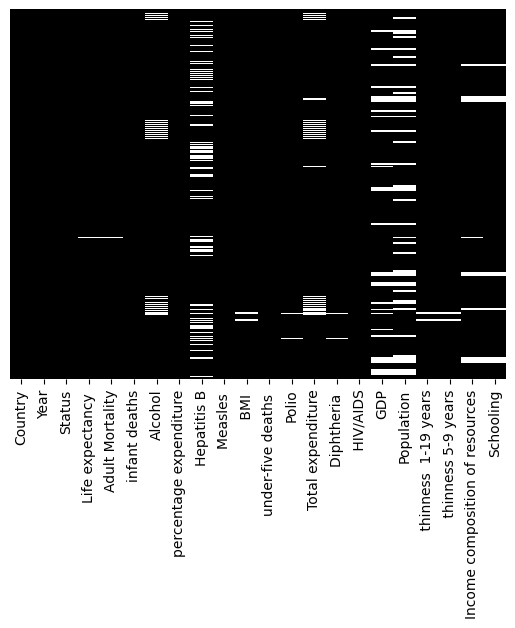

In [17]:
#checking the amount of missing data present using visualization
#using heatmap as it represents individual values with colors(so that missing values can be viewed easily)
sns.heatmap(Life_exp_data.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')
#Here the condition is null value. So wherever the missing values are present that point/feature point will be represents with diff color
#Making the cbar false as i don't want ot represent every sample to get represented in the color range available 
#Made yticklabels false as i don't want to name the each sample in this huge data set and also only concentrating on features which i can find in x-axis

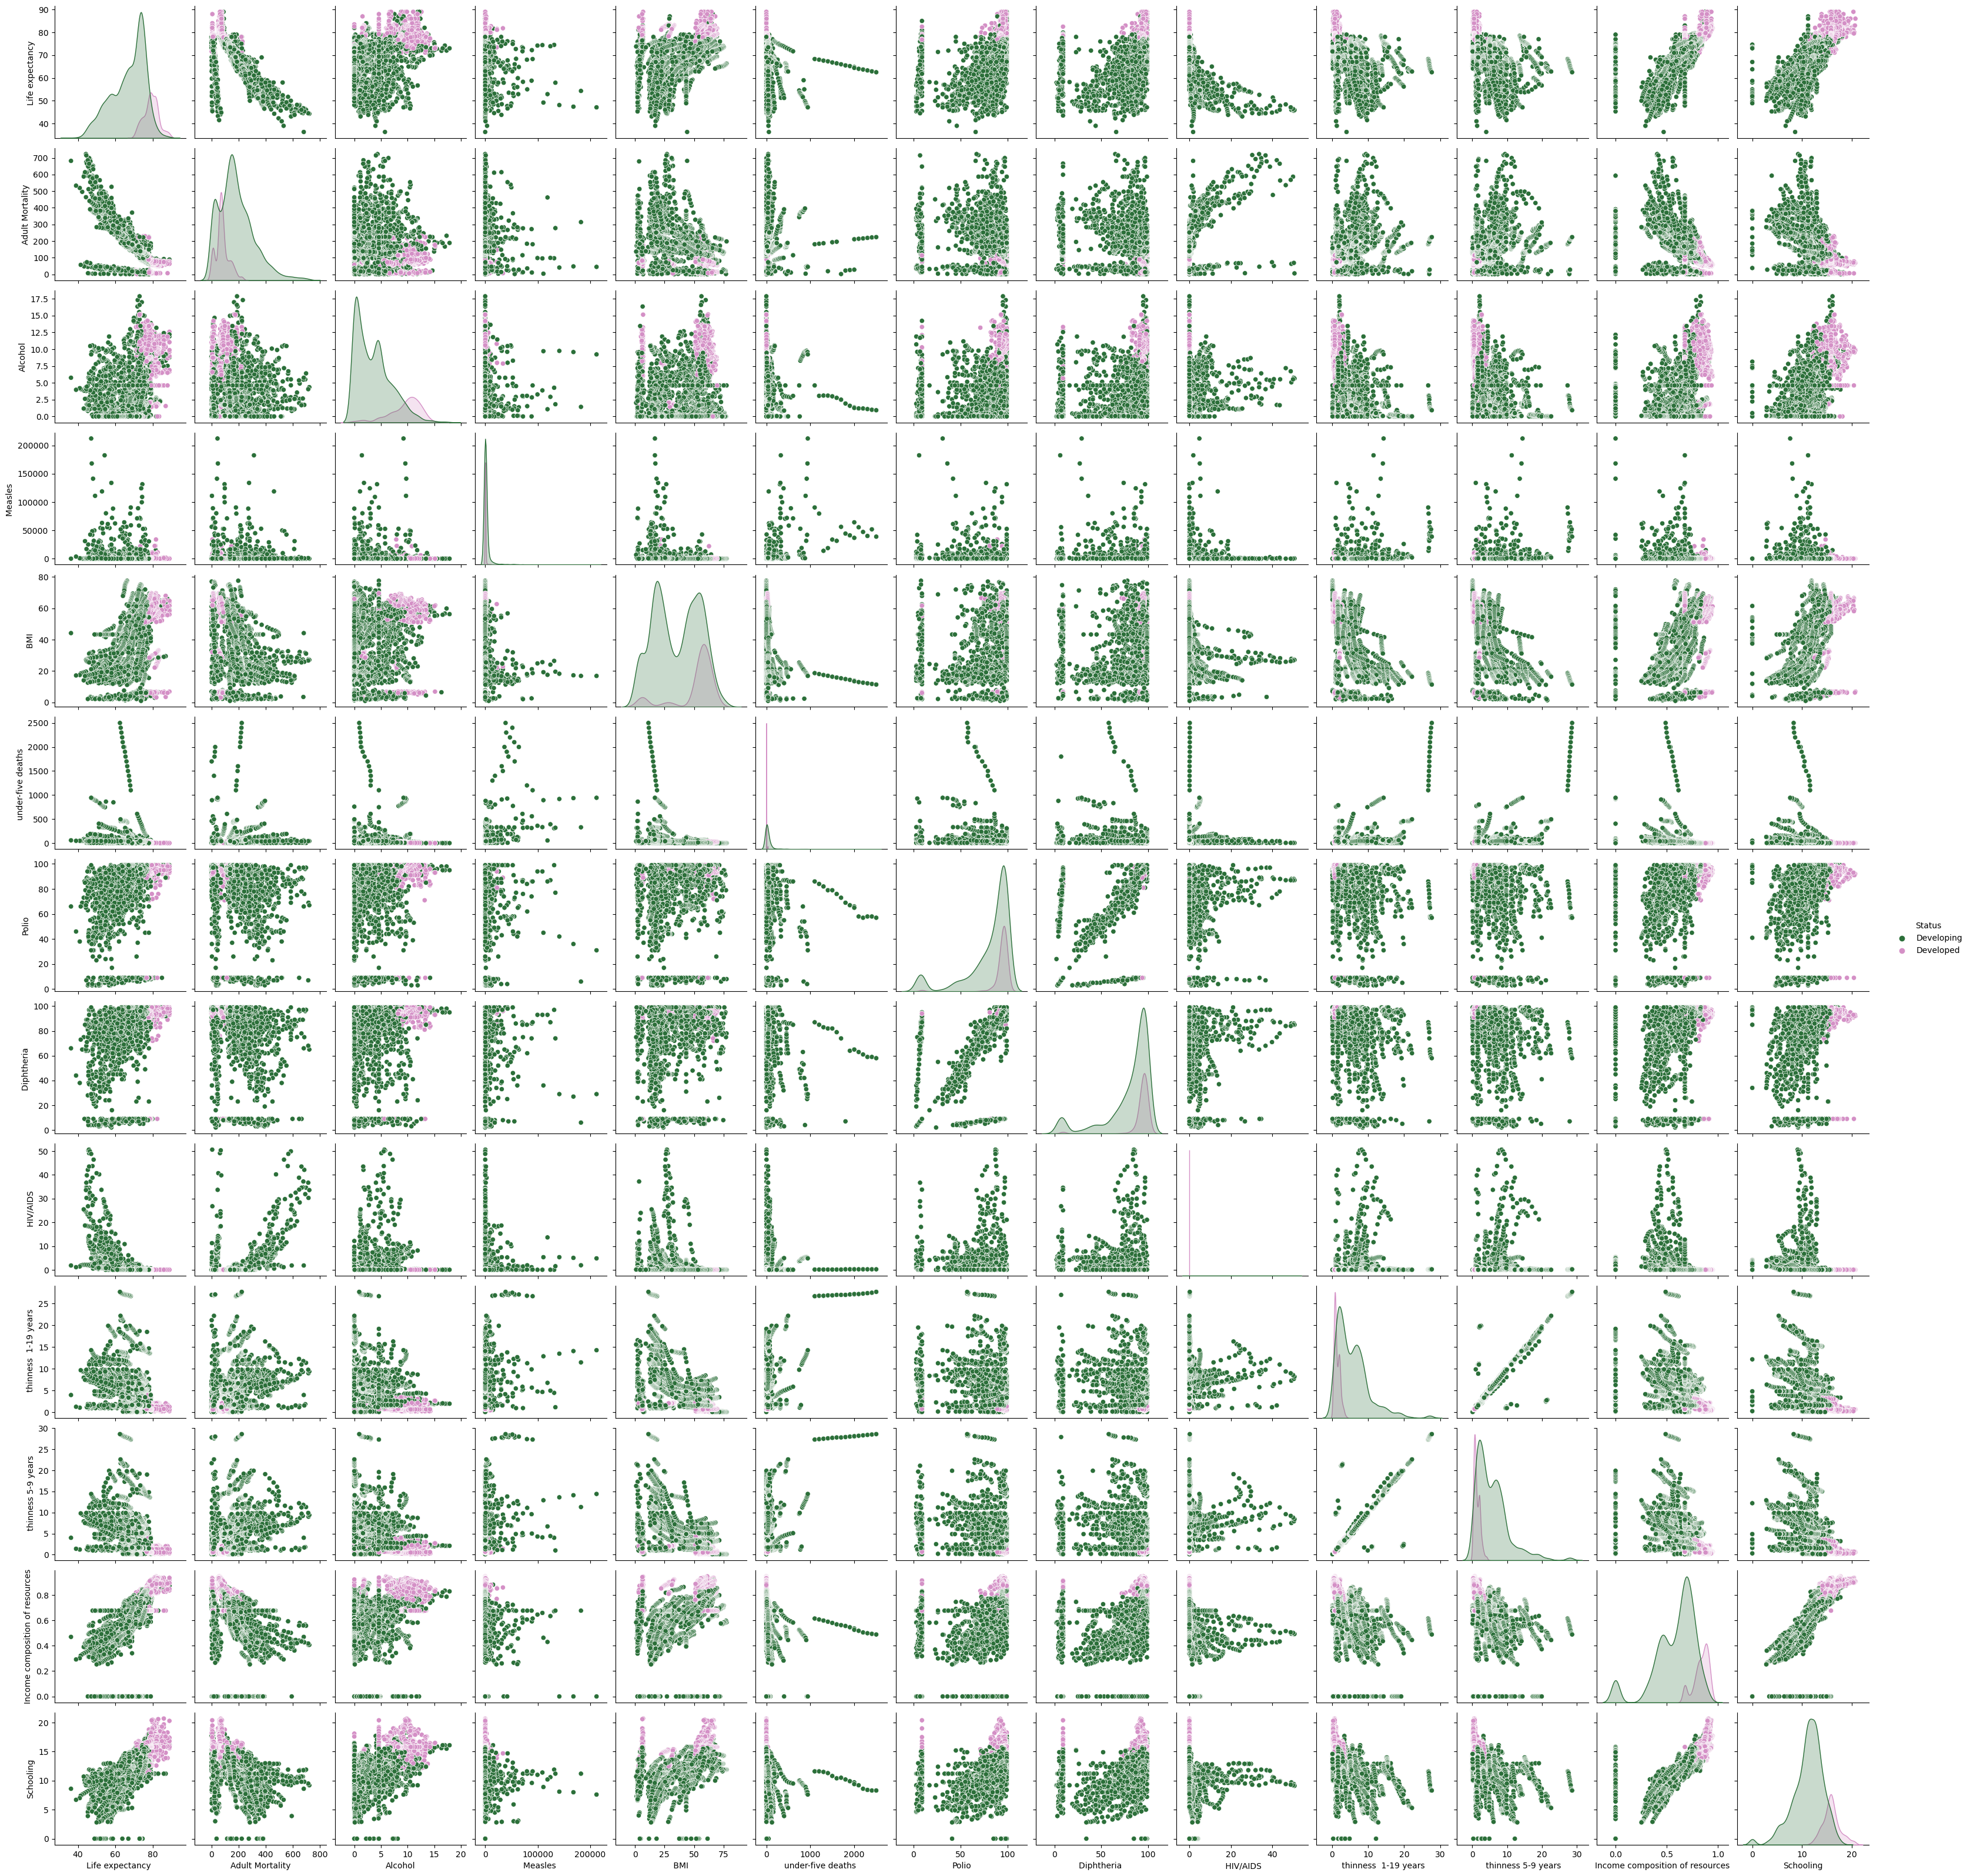

In [322]:
sns.pairplot(Life_exp_data,hue='Status',palette='cubehelix')

__Now depending upon the importance of feature i.e the contribution of it to the prediction variable we gonna decide to fill them or remove them__

__We will start With the feature which are having more number of missing values as we can't delete them__

__Prior to that we should know which features are actually predictor variables other wise we can simply delete them__

/var/folders/pq/ncc84cyn6cl7mhcszk5vx8900000gn/T/ipykernel_1682/2239610401.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Life_exp_data.corr(),annot=True)


<Axes: >

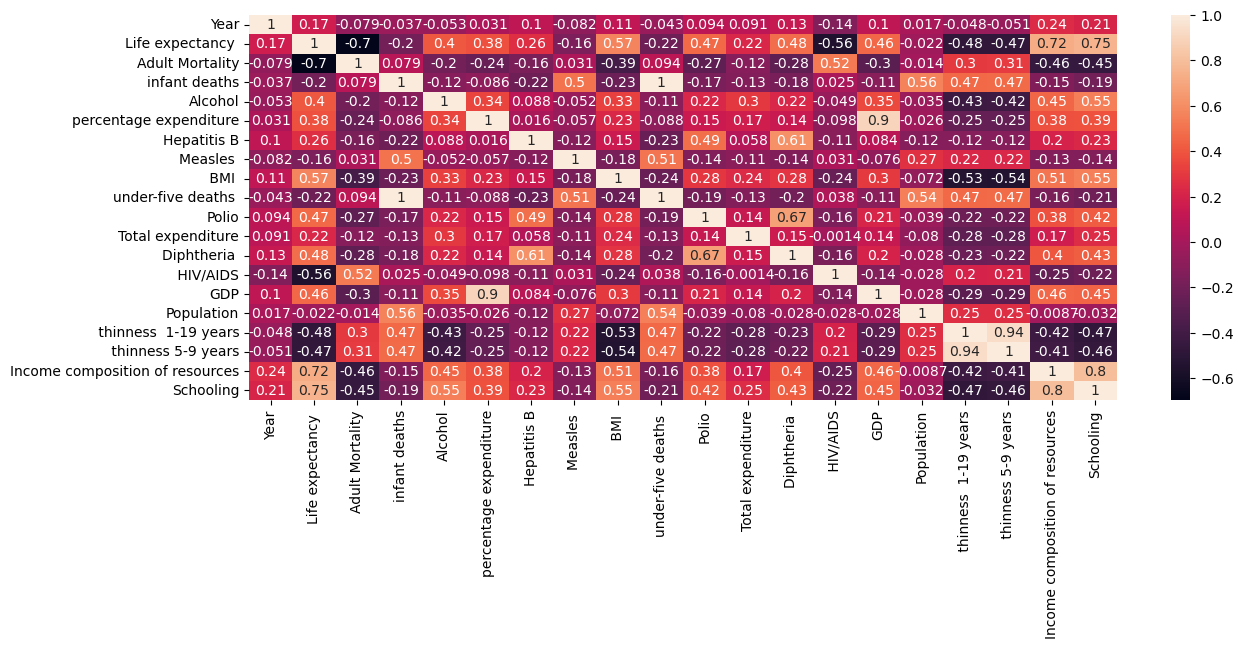

In [21]:
#using the heatmap of correlation to find out which features are actually contributing with correlation >=0.4
plt.figure(figsize=(14,5))
sns.heatmap(Life_exp_data.corr(),annot=True)

__Starting with the Quantitative Features/Predictors__

# Feature Selection

__We'll figure out which of the features will be the predictor variables depending upon the above heatmap__

__->Year has nothing to do with the Target variable as it informs the time frame of data collection(Not a predictor)__

__->Adult mortality has a negative correlation effect on target variable i.e -0.7 so it will be (predictor)__

__->Infant deaths seems to be not effecting much having a correlation values near to zero(not a predictor)__

__->Alcohol with corr value 0.4(predictor)-In generally the amount of regular intake of alcohol is going to effect one's health__

__->percentage expenditure(not a predictor)__

__->hepatitis B will be a predictor even though it's having a less corr value(on the basis of domain knowledge)__


__->Same With Measles,polio__

__->BMI(predictor)__

__->Under-five deaths(not a predictor)__

__->Total-expenditure(not a predictor)__

__->Diptheria(predictor)__

__->Hiv(predictor)__

__->GDp(predictor)__

__->population(not a predictor)__

__->thinness 1-19 years,5-9 years(predictors)__

__->Income composition of resources(predictor)__

__->SCHOOLING(predictor)__



# Dropping the features which are not going to help

In [28]:
Features_to_drop=['Year','infant deaths','percentage expenditure','Total expenditure','Population']

In [56]:
Life_exp_data.drop(columns=Features_to_drop,axis=1,inplace=True)

<Axes: >

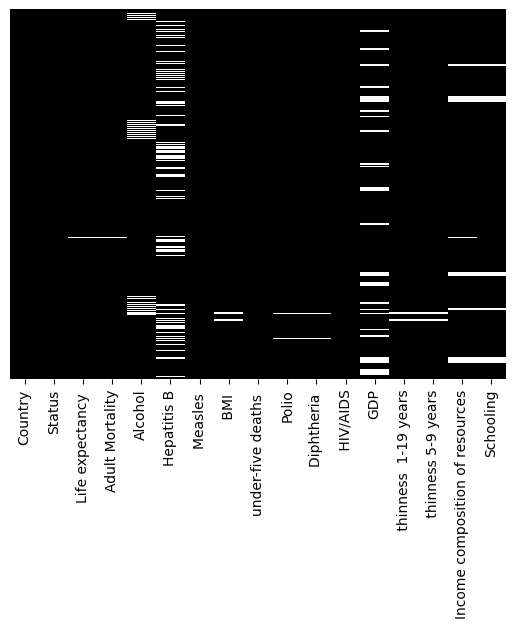

In [55]:
sns.heatmap(Life_exp_data.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')

__We are left with the features i.e actually predictors__

__Starting with the Quantitative Predictors__

<Axes: xlabel='Status', ylabel='Schooling'>

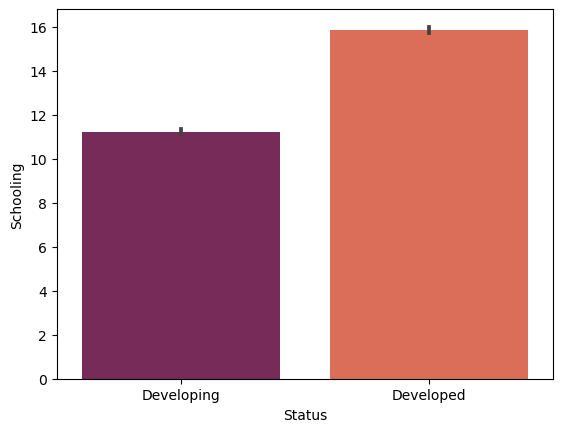

In [316]:
sns.barplot(x='Status',y='Schooling',data=Life_exp_data,palette='rocket')

__From the above plot we can clearly see that schooling values varies among the two kinds of countries__

__Therefore filling the missing values of schooling is done on the basis of status__

In [81]:
Average_Schooling_value=Life_exp_data.groupby('Status')['Schooling'].mean()

In [82]:
Average_Schooling_value

Status
Developed     15.845474
Developing    11.219256
Name: Schooling, dtype: float64

# Imputing the Missing values

__Finding the Appropriate rows and filling the values accordingly__

In [83]:
Life_exp_data.loc[Life_exp_data['Status']=='Developed','Schooling']=Life_exp_data.loc[Life_exp_data['Status']=='Developed','Schooling'].fillna(value=15.8)

In [84]:
Life_exp_data.loc[Life_exp_data['Status']=='Developing','Schooling']=Life_exp_data.loc[Life_exp_data['Status']=='Developing','Schooling'].fillna(value=11.2)

__GDP__

In [99]:
By_country=Life_exp_data.groupby('Country')['GDP'].mean()

In [114]:
By_country

Country
Afghanistan                            340.015425
Albania                               2119.726679
Algeria                               2847.853392
Angola                                1975.143045
Antigua and Barbuda                   9759.305728
                                         ...     
Venezuela (Bolivarian Republic of)            NaN
Viet Nam                                      NaN
Yemen                                         NaN
Zambia                                 811.811841
Zimbabwe                               410.980194
Name: GDP, Length: 193, dtype: float64

<Axes: xlabel='Life expectancy ', ylabel='GDP'>

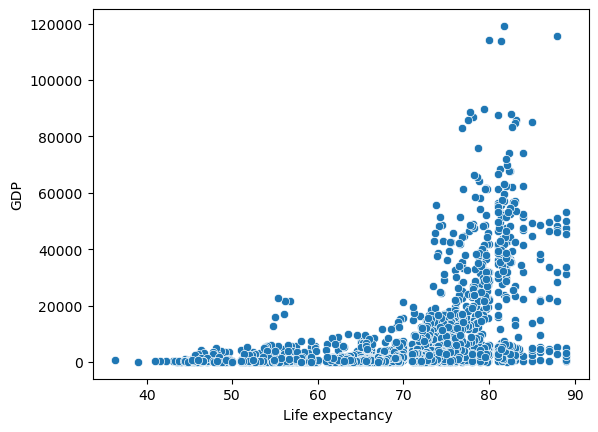

In [113]:
sns.scatterplot(x='Life expectancy ',y='GDP',data=Life_exp_data)

__Looking at the scatter plot for the data provided GDP is not going to help for the prediction of life expectancy as i could'nt find linear relation__

In [115]:
#dropping the GDP feature
Life_exp_data.drop(columns='GDP',axis=1,inplace=True)

__Hepatitis B__

__There are 553 missing values for this feature and the corr value is 0.2__

__Therefore instead of filling them we'll drop the feature__


In [118]:
Life_exp_data.drop(columns='Hepatitis B',axis=1,inplace=True)

__Removing the rows where our target variable values ae missing as they are just 10(very less when compared to the total number of samples available)__

In [132]:
Life_exp_data.dropna(subset=['Life expectancy '],inplace=True)

In [134]:
#sns.heatmap(Life_exp_data.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')

__Alcohol__

__There are 194 missing samples and instead of removing them an appropriate value can be filled into them as it plays a key role in determining health__

__I'm considering replacing the missing samples with avg values__

In [145]:
Life_exp_data['Alcohol'].fillna(value=Life_exp_data['Alcohol'].mean(),inplace=True)

 __Thinness 1-19 years__

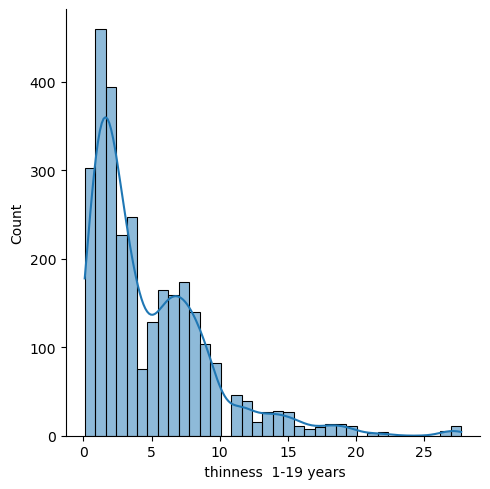

In [214]:
sns.displot(Life_exp_data[' thinness  1-19 years'],kde=True)

__The above distribution is skewed(left) if i attempt using filling the mean value it may drag the value to the majority samples side and the values will be biased.So filling with the median value__

In [208]:
Life_exp_data[' thinness  1-19 years'].fillna(value=Life_exp_data[' thinness  1-19 years'].median(),inplace=True)

__Thinness 5-9 years__

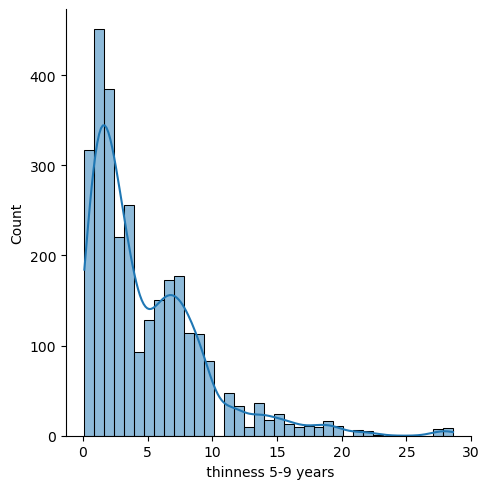

In [215]:
sns.displot(Life_exp_data[' thinness 5-9 years'],kde=True)

In [210]:
Life_exp_data[' thinness 5-9 years'].fillna(value=Life_exp_data[' thinness 5-9 years'].median(),inplace=True)

__BMI__

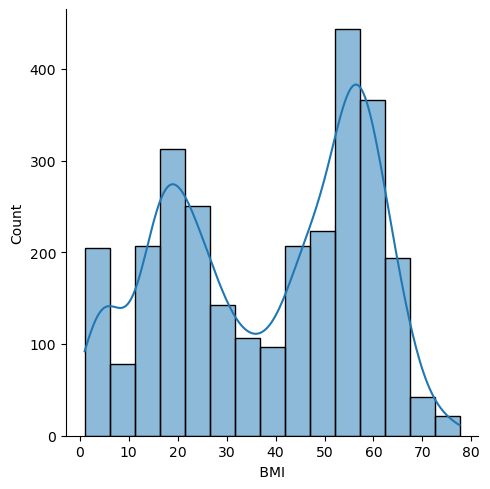

In [205]:
sns.displot(Life_exp_data[' BMI '],kde=True)

__The above feature follows Bimodal probability Distribution__

__Could'nt attempt filling the missing values with mean as the two peaks(modes) will effect the mean__

__Same with the mode as it does'nt capture the underlying samples__

__Going to fill with Median value(prone to the effect of outliers and also from the peaks/modes)__

In [211]:
Life_exp_data[' BMI '].fillna(value=Life_exp_data[' BMI '].median(),inplace=True)

__Polio__

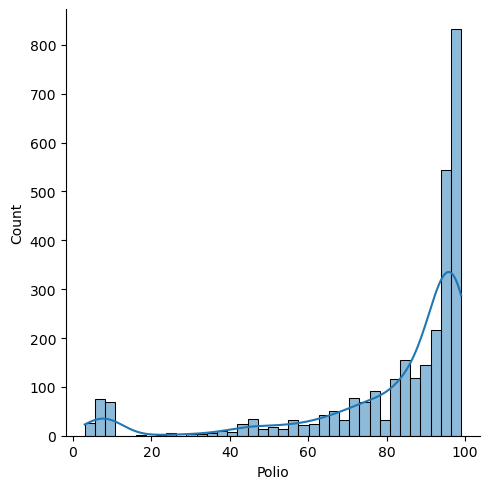

In [217]:
sns.displot(Life_exp_data['Polio'],kde=True)

__The above distribution is right skewed and mean is not at all a option to fill missing values as it'll be biased__

In [218]:
Life_exp_data['Polio'].fillna(value=Life_exp_data['Polio'].median(),inplace=True)

__Diptheria__

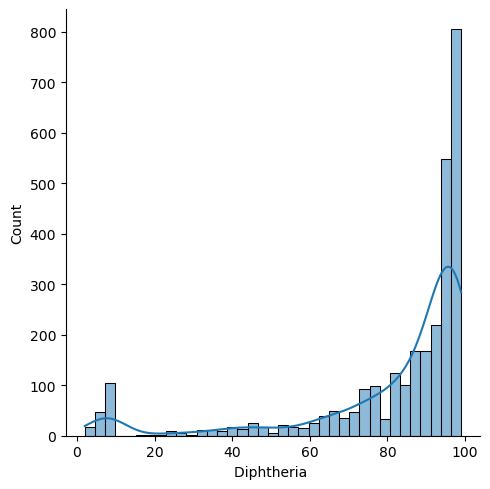

In [219]:
sns.displot(Life_exp_data['Diphtheria '],kde=True)

__This feature also shows the same distribution as previous feature so filling the missing values with Median__

In [220]:
Life_exp_data['Diphtheria '].fillna(value=Life_exp_data['Diphtheria '].median(),inplace=True)

__Income Composition of resource__

<Axes: xlabel='Income composition of resources', ylabel='Life expectancy '>

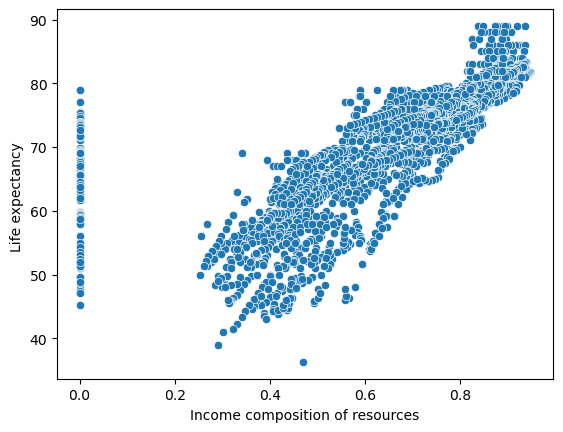

In [149]:
sns.scatterplot(x='Income composition of resources',y='Life expectancy ',data=Life_exp_data)

__From the above plot it is clear that 'Income composition of resources' is going to be strong predictor for the target variable__

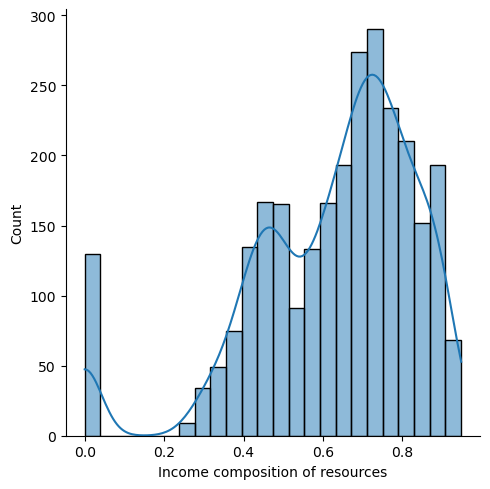

In [222]:
sns.displot(Life_exp_data['Income composition of resources'],kde=True)

__Income composition of resources__

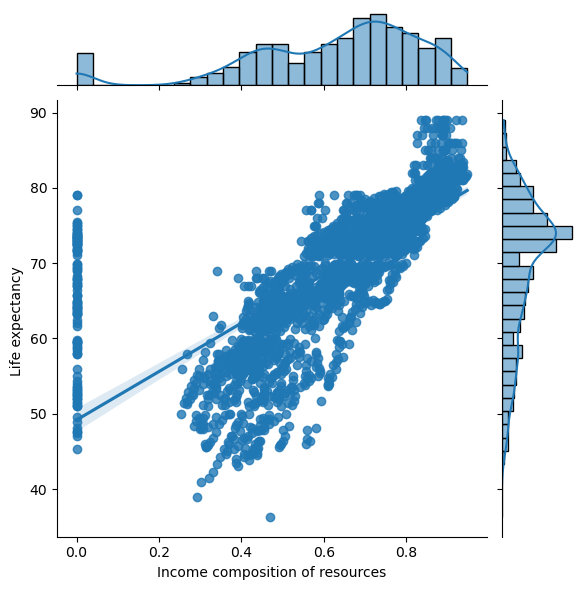

In [275]:
sns.jointplot(x='Income composition of resources',y='Life expectancy ',data=Life_exp_data,kind='reg')

__From the above plot it is clear that the pdf of 'Income composition of resources' is right skewed__

__I can see some clear outliers out there and i won't be dealing with them now as i'm only concerned with imputations as of now__

__Being a right skewed feature i haved decided again to go with median value for imputation__

In [276]:
Life_exp_data['Income composition of resources'].fillna(value=Life_exp_data['Income composition of resources'].median(),inplace=True)

<Axes: >

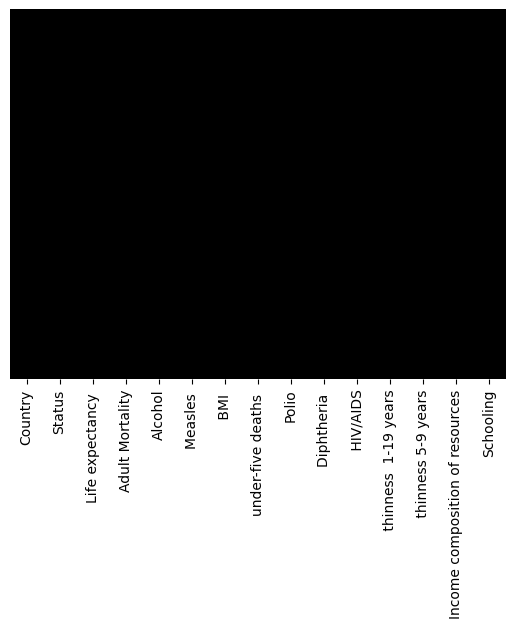

In [277]:
sns.heatmap(Life_exp_data.isnull(),yticklabels=False,cbar=False,cmap='cubehelix')

__Now looking at the heatmap it is clear that we are not having missing values anymore__

__As of now we are done Imputations,now we will check for outliers using Z score method__

# Checking for outliers using Z score method

__Calculating Z score__

In [278]:
#Z score can be calculated 
from scipy.stats import zscore

In [279]:
#Need to drop these categorical columns to perform numpy operation on the dataset
cols_to_drop=['Country','Status']

In [280]:
z=np.abs(zscore(Life_exp_data.drop(columns=cols_to_drop),axis=1))

In [281]:
z

Life expectancy   Adult Mortality   Alcohol  Measles       BMI   \
0             0.217004         0.436072  0.431365  3.374916  0.368399   
1             0.176940         1.367586  0.615129  2.984545  0.479114   
2             0.162355         1.538853  0.651952  2.863195  0.504068   
3             0.276920         0.013303  0.358169  3.448179  0.334145   
4             0.279143         0.006688  0.353872  3.450127  0.332169   
...                ...              ...       ...       ...       ...   
2933          0.202333         3.441925  0.416789  0.273747  0.294688   
2934          0.349664         1.839759  0.481715  2.763856  0.407788   
2935          0.106406         0.258647  0.629001  3.248974  0.345891   
2936          0.341947         2.673054  0.547025  1.934244  0.433239   
2937          0.355599         1.155137  0.463767  3.151554  0.405632   

      under-five deaths      Polio  Diphtheria    HIV/AIDS  \
0               0.157634  0.411608     0.217004   0.431068   
1               0.014022  0.190842     0.161576   0.614471   
2               0.075537  0.145187     0.128837   0.651217   
3               0.231167  0.266677     0.266677   0.358046   
4               0.231419  0.268032     0.268032   0.353758   
...                  ...       ...          ...        ...   
2933            0.214682  0.080446     0.091185   0.259786   
2934            0.361093  0.472115     0.272928   0.375134   
2935            0.168543  0.258647     0.232757   0.171132   
2936            0.371594  0.197479     0.202185   0.357006   
2937            0.372683  0.277500     0.277500   0.361701   

       thinness  1-19 years   thinness 5-9 years  \
0                  0.374666             0.374336   
1                  0.487162             0.487162   
2                  0.507338             0.507338   
3                  0.333735             0.333599   
4                  0.330906             0.330906   
...                     ...                  ...   
2933               0.389727             0.389727   
2934               0.462972             0.462646   
2935               0.670814             0.669520   
2936               0.547590             0.547120   
2937               0.441020             0.440532   

      Income composition of resources  Schooling  
0                            0.429818   0.398085  
1                            0.611720   0.542037  
2                            0.648192   0.571102  
3                            0.357550   0.344798  
4                            0.353311   0.341890  
...                               ...        ...  
2933                         0.438015   0.390801  
2934                         0.493608   0.463952  
2935                         0.680821   0.556897  
2936                         0.553110   0.509003  
2937                         0.466808   0.443949  

[2928 rows x 13 columns]

__Having Z score criteria of +3/-3 (every sample value greater/lesser than that will be considered as outlier and will be removed)__

__At the glance other than some "Measles" samples rest of the predictor samples are within the considered range__

__Inorder to remove these feature samples we'll mask those outliers__

In [302]:
#setting the threshold z score
#setting a bit higher than usual as most the data is not normally distributed but skewed.
Z_criteria=3.3

In [303]:
Outliers_masking=(z<Z_criteria).all(axis=1)

In [304]:
Final_data=Life_exp_data[Outliers_masking]

In [305]:
Final_data

Country      Status  Life expectancy   Adult Mortality  Alcohol  \
1     Afghanistan  Developing              59.9            271.0     0.01   
2     Afghanistan  Developing              59.9            268.0     0.01   
11    Afghanistan  Developing              57.0            293.0     0.02   
12    Afghanistan  Developing              56.7            295.0     0.01   
16        Albania  Developing              77.8             74.0     4.60   
...           ...         ...               ...              ...      ...   
2932     Zimbabwe  Developing              44.6            717.0     4.14   
2934     Zimbabwe  Developing              44.5            715.0     4.06   
2935     Zimbabwe  Developing              44.8             73.0     4.43   
2936     Zimbabwe  Developing              45.3            686.0     1.72   
2937     Zimbabwe  Developing              46.0            665.0     1.68   

      Measles    BMI   under-five deaths   Polio  Diphtheria    HIV/AIDS  \
1          492   18.6                  86   58.0         62.0        0.1   
2          430   18.1                  89   62.0         64.0        0.1   
11         466   13.8                 120    5.0          5.0        0.1   
12         798   13.4                 122   41.0         41.0        0.1   
16           0   58.0                   0   99.0         99.0        0.1   
...        ...    ...                 ...    ...          ...        ...   
2932       420   27.5                  43   69.0         68.0       30.3   
2934       998   26.7                  41    7.0         68.0       36.7   
2935       304   26.3                  40   73.0         71.0       39.8   
2936       529   25.9                  39   76.0         75.0       42.1   
2937      1483   25.5                  39   78.0         78.0       43.5   

       thinness  1-19 years   thinness 5-9 years  \
1                      17.5                 17.5   
2                      17.7                 17.7   
11                     19.5                 19.7   
12                     19.7                 19.9   
16                      1.2                  1.3   
...                     ...                  ...   
2932                    9.0                  9.0   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  
1                               0.476       10.0  
2                               0.470        9.9  
11                              0.381        6.8  
12                              0.373        6.5  
16                              0.762       14.2  
...                               ...        ...  
2932                            0.406        9.3  
2934                            0.418        9.5  
2935                            0.427       10.0  
2936                            0.427        9.8  
2937                            0.434        9.8  

[2233 rows x 15 columns]

# Exploratory Data Analysis for Categorical Features

__Status__

<Axes: xlabel='Status', ylabel='count'>

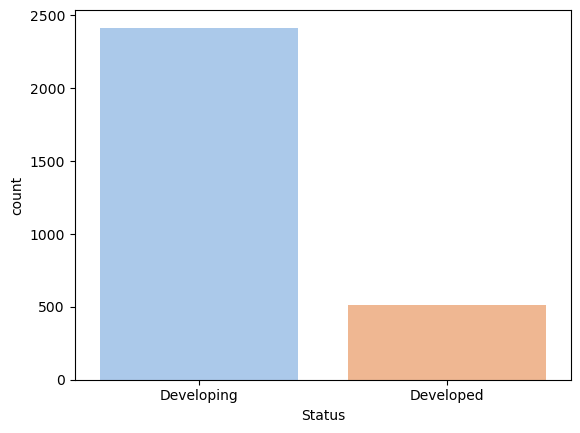

In [314]:
sns.countplot(x='Status',data=Life_exp_data,palette='pastel')

__Checking upto which extent this predictor is related to our target variable using violin plot__

<Axes: xlabel='Status', ylabel='Life expectancy '>

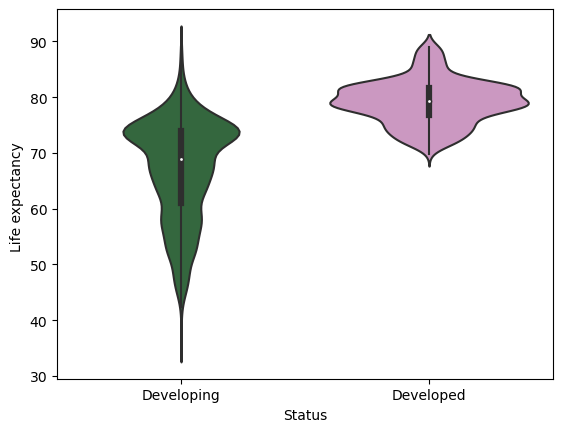

In [321]:
sns.violinplot(x='Status',y='Life expectancy ',data=Life_exp_data,palette='cubehelix')

__The plot is appropriate as the Developed countries has least samples of low life expectancy which makes sense because of all the resources and facilities available__

__We are left with the final process of feature engineering i.e scaling the numerical features and label encoding/one hot encoding for categorical features__

# Feature Engineering

# label Encoding for 'Status' feature

In [327]:
#Using lambda function for label encoding
Enc=lambda x: 0 if x=='Developing' else 1

In [338]:
Final_data['Enc_Status']=Final_data['Status'].apply(Enc)

/var/folders/pq/ncc84cyn6cl7mhcszk5vx8900000gn/T/ipykernel_1682/2408643310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data['Enc_Status']=Final_data['Status'].apply(Enc)


In [339]:
#Remove the previous Feature inorder to avoid duplicacy
Final_data.drop('Status',axis=1,inplace=True)

/var/folders/pq/ncc84cyn6cl7mhcszk5vx8900000gn/T/ipykernel_1682/662985038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data.drop('Status',axis=1,inplace=True)


__Country__

In [334]:
Life_exp_data['Country'].nunique()

183

__Therefore i have 183 countries here in the data i.e 183 categories(High cardinality)__

__Here because of high cardinality i'll prefer count/frequency encoding to one hot encoding__

In [335]:
Life_exp_data['Country'].value_counts()

Afghanistan    16
New Zealand    16
Niger          16
Nigeria        16
Norway         16
               ..
Ghana          16
Greece         16
Grenada        16
Guatemala      16
Zimbabwe       16
Name: Country, Length: 183, dtype: int64

__But if i look at the frequencies of categories they are almost same because of which i can't go for frquency encoding(if i prefer doing it every sample would be replaced with same value leading to the inefficiency of the feature)__

__As the target is to predict the Life expectancy depending upon lot of demographical values and health indicators there's nothing to do with the country name.so dropping this particular column__

In [344]:
Final_data.drop('Country',axis=1,inplace=True)

/var/folders/pq/ncc84cyn6cl7mhcszk5vx8900000gn/T/ipykernel_1682/2940960557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data.drop('Country',axis=1,inplace=True)


In [345]:
Final_data

Life expectancy   Adult Mortality  Alcohol  Measles    BMI   \
1                 59.9            271.0     0.01       492   18.6   
2                 59.9            268.0     0.01       430   18.1   
11                57.0            293.0     0.02       466   13.8   
12                56.7            295.0     0.01       798   13.4   
16                77.8             74.0     4.60         0   58.0   
...                ...              ...      ...       ...    ...   
2932              44.6            717.0     4.14       420   27.5   
2934              44.5            715.0     4.06       998   26.7   
2935              44.8             73.0     4.43       304   26.3   
2936              45.3            686.0     1.72       529   25.9   
2937              46.0            665.0     1.68      1483   25.5   

      under-five deaths   Polio  Diphtheria    HIV/AIDS  \
1                     86   58.0         62.0        0.1   
2                     89   62.0         64.0        0.1   
11                   120    5.0          5.0        0.1   
12                   122   41.0         41.0        0.1   
16                     0   99.0         99.0        0.1   
...                  ...    ...          ...        ...   
2932                  43   69.0         68.0       30.3   
2934                  41    7.0         68.0       36.7   
2935                  40   73.0         71.0       39.8   
2936                  39   76.0         75.0       42.1   
2937                  39   78.0         78.0       43.5   

       thinness  1-19 years   thinness 5-9 years  \
1                      17.5                 17.5   
2                      17.7                 17.7   
11                     19.5                 19.7   
12                     19.7                 19.9   
16                      1.2                  1.3   
...                     ...                  ...   
2932                    9.0                  9.0   
2934                    9.8                  9.9   
2935                    1.2                  1.3   
2936                    1.6                  1.7   
2937                   11.0                 11.2   

      Income composition of resources  Schooling  Enc_Status  
1                               0.476       10.0           0  
2                               0.470        9.9           0  
11                              0.381        6.8           0  
12                              0.373        6.5           0  
16                              0.762       14.2           0  
...                               ...        ...         ...  
2932                            0.406        9.3           0  
2934                            0.418        9.5           0  
2935                            0.427       10.0           0  
2936                            0.427        9.8           0  
2937                            0.434        9.8           0  

[2233 rows x 14 columns]

__We are left with the final process of Feature engineering i.e Feature scaling__

# Feature Scaling

__Here i prefer to use Standard scaling technique insted of Normalization(min max scaling)__

# Spliting the  Predictors and target variable

In [365]:
#Assigning Predictors
X=Final_data.iloc[:,1:]

In [366]:
#Assigning Target variable
y=Final_data.iloc[:,0:1]

# Splitting the data into train data and test data

In [374]:
#Intial split involves creation of train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [375]:
from sklearn.preprocessing import StandardScaler

In [376]:
#Initialising the object 
Sc=StandardScaler()

In [378]:
#Fitting and transforming the predictors(both train and test)
X_train_scaled=Sc.fit_transform(X_train)

In [379]:
X_test_scaled=Sc.fit_transform(X_test)

# Linear Regression Model

In [380]:
#importing the ML Model
from sklearn.linear_model import LinearRegression

In [381]:
#Initialising the object for the model
LR=LinearRegression()

In [383]:
#Fitting the model to the train dataset
LR.fit(X_train_scaled,y_train)

LinearRegression()

In [384]:
Predictions=LR.predict(X_test_scaled)

In [395]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('Mean Squared Error:',mean_squared_error(y_test,Predictions))
print('R Squared Value:',r2_score(y_test,Predictions))

Mean Squared Error: 16.221255869884057
R Squared Value: 0.7751305956990715


# Ridge Regression

In [396]:
#Importing the model
from sklearn.linear_model import Ridge

In [397]:
#Multiplier value for the Square of slopes
Lambda=1

In [398]:
RD=Ridge(alpha=Lambda)

In [399]:
RD.fit(X_train_scaled,y_train)

Ridge(alpha=1)

In [400]:
Rpred=RD.predict(X_test_scaled)

In [401]:
print('Mean Squared Error:',mean_squared_error(y_test,Rpred))
print('R Squared Value:',r2_score(y_test,Rpred))

Mean Squared Error: 16.218826754729417
R Squared Value: 0.7751642696440596


# Random forest Regression

In [402]:
from sklearn.ensemble import RandomForestRegressor

In [404]:
#creating the object for the model
RF=RandomForestRegressor(n_estimators=100,random_state=40)

In [405]:
RF.fit(X_train_scaled,y_train)

/var/folders/pq/ncc84cyn6cl7mhcszk5vx8900000gn/T/ipykernel_1682/1475259158.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train_scaled,y_train)


RandomForestRegressor(random_state=40)

In [406]:
Prediction_RF=RF.predict(X_test_scaled)

In [407]:
print('Mean Squared Error:',mean_squared_error(y_test,Prediction_RF))
print('R Squared Value:',r2_score(y_test,Prediction_RF))

Mean Squared Error: 5.188122439620074
R Squared Value: 0.9280789347140738


# Support Vector Regression

In [408]:
from sklearn.svm import SVR

In [420]:
#Initializing the object
SR=SVR(kernel='linear',C=1)

In [421]:
SR.fit(X_train_scaled,y_train)

/Users/raviirt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1, kernel='linear')

In [422]:
PSR=SR.predict(X_test_scaled)

In [423]:
print('Mean Squared Error:',mean_squared_error(y_test,PSR))
print('R Squared Value:',r2_score(y_test,PSR))

Mean Squared Error: 18.015729292429764
R Squared Value: 0.7502544595479322


# Best Performing Model

__From the stats of MSE and R squared values it is clear that Random forest regressor is the best performing model among all__

__As we know its effective and unbiased Ensembling technique which involves Bagging,Bootstrapping and Aggregating makes it a best regression model with low bias and low variance__

# Looking out for the most important/influencial Feature for our target variable i.e Life Expectancy 

__What are the actually indicators of a country on which one's life depends?__

In [424]:
#Preexisitng attribute to know the future importance or coefficients assigned to each feature by the random forest model
Feature_Importance=RF.feature_importances_

In [425]:
Feature_Importance

array([0.20452388, 0.01347718, 0.0061109 , 0.01601015, 0.02744489,
       0.00402951, 0.00356165, 0.40395124, 0.00883314, 0.01226526,
       0.28302642, 0.01582266, 0.00094315])

In [428]:
for feature,effect in zip(X_train.columns,Feature_Importance):
    print(f'{feature}:{effect}')

Adult Mortality:0.20452388084708914
Alcohol:0.013477177687112476
Measles :0.0061108973349806315
 BMI :0.016010145860304397
under-five deaths :0.02744489022650679
Polio:0.004029505634966949
Diphtheria :0.0035616457407295007
 HIV/AIDS:0.40395123602020444
 thinness  1-19 years:0.0088331437854195
 thinness 5-9 years:0.01226525530612243
Income composition of resources:0.283026415635105
Schooling:0.015822656311902456
Enc_Status:0.0009431496095562606


In [434]:
Conclusion_data=[{'Feature':feature,'Contributing Factor':effect}for feature,effect in zip(X_train.columns,Feature_Importance)]

In [435]:
Features_effect=pd.DataFrame(Conclusion_data)

In [447]:
Sorted_Feature_Data=Features_effect.sort_values(by='Contributing Factor',ascending=False).reset_index(drop=True)

In [451]:
Sorted_Feature_Data

Feature  Contributing Factor
0                          HIV/AIDS             0.403951
1   Income composition of resources             0.283026
2                   Adult Mortality             0.204524
3                under-five deaths              0.027445
4                              BMI              0.016010
5                         Schooling             0.015823
6                           Alcohol             0.013477
7                thinness 5-9 years             0.012265
8              thinness  1-19 years             0.008833
9                          Measles              0.006111
10                            Polio             0.004030
11                      Diphtheria              0.003562
12                       Enc_Status             0.000943

# Learning Outcome

__As we can see the features in their priority order__

__HIV: We can see HIV being the top factor for the life expectancy estimation as it is still major cause for mortaility rates among all the underdeveloped and some developing countries__

__Income composition of resources:Yes this factor is important as it decides from which resources one's country's income is coming from and what are the risk factors it is involving__

__Adult Mortality and under-five deaths:These two parameters showcase the health standards and health facilities available within the country which will be deciding individual's health__

__BMI:It is not a surprise that BMI is not being a strong indicator regarding health.Since many years it was termed as easy and fast health indicator but eventually through extensive research it turned out to be not as it does'nt inform much more important and underlying health conditions__

__Schooling:Little contribution but important as one of the medium for awarness__

__Alcohol: Same as Schooling a little effect but can'nt be ignored__

__thinness 5-9 years and thinness 1-19 years:No wonder that these factors are being predictors as being think indicates being under muscled and therefore being prone to multiple health issues__

__Measles,Polio and Diphtheria:Yes they were problamatic for so many countries but with effective medication practices things are getting better and countries are becoming good at curbing these therefore a very less effect__

__Country Status: If the country is wealthy and having enough facilities does'nt mean every human being out there will be healthy it also depends on it's distribution of facilities so still it possess some effect on Life expectancy__